In [54]:
import numpy as np
from preprocessing import *
from plotting import *
import sys
import seaborn
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
import string
import nltk
#from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas import read_table
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import os
os.getcwd()
os.chdir("C:/Users/Manika/Desktop/Dataset")

In [55]:
lmtzr = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import wordnet
os.getcwd()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Manika\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Manika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'C:\\Users\\Manika\\Desktop\\Dataset'

In [56]:
def download_data(url):
    frame = read_table(url, encoding = "utf-8", sep = ",", skipinitialspace = True, index_col = None, header = 0)
    return frame

In [57]:
def parse_out_text(text_string):
    text_string = text_string.replace("[comma]", " ")
    text_string = text_string.replace("\t", " ")
    text_string = text_string.replace("  ", " ")
    text_string = text_string.translate(''.maketrans("", "", string.punctuation))
    return text_string

In [58]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [59]:
def execute(clf, clf_name, X_train, X_test, y_train, y_test, with_ovr = False):
    clf.fit(X_train, y_train)
    try:
        print("{}".format(clf.best_estimator_))
    except:
        pass

    pred = clf.predict(X_test)
    score = f1_score(y_test, pred, average='weighted')
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average=None)
    recall = recall_score(y_test,pred,average=None)
    print('{} (F1 score={:.3f}, Accuracy={:.4f})'.format(clf_name, score, acc))
    print("Precision: ", precision)
    print("Recall: ",recall)
                                
    try:
        y_prob = clf.decision_function(X_test)
    except AttributeError:
        # Handle BernoilliNB
        y_prob = clf.predict_proba(X_test)

    precision, recall, avg = get_per_class_pr_re_and_avg(y_test, y_prob) if with_ovr else (0.,0.,0.)
    
    
    if with_ovr:
        print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(avg["micro"]))
    return precision, recall, avg

In [60]:
def lemmatize(text):
    tokens = word_tokenize(text)
    pos_tagged = nltk.pos_tag(tokens)
    return " ".join([lmtzr.lemmatize(w[0], pos = get_wordnet_pos(w[1])) for w in pos_tagged])

In [61]:
def execute_using_cv(X, y, use_ovr=False):
    '''
    Stand-alone function to executes and plot evaluation metrics using explicit (averaged) 10-Fold CV and SVM.
    'use_ovr' for multiclass data.
    Ref: http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_digits.html#sphx-glr-auto-examples-exercises-plot-cv-digits-py
    '''
    print(__doc__)

    import numpy as np
    from sklearn.model_selection import cross_val_score
    from sklearn import datasets, svm

    #digits = datasets.load_digits()
    #X = digits.data
    #y = digits.target
    svc = svm.SVC(kernel='linear')

    if use_ovr:
        from sklearn.multiclass import OneVsRestClassifier
        svc = OneVsRestClassifier(svc)

    C_s = np.logspace(-2, 1, 10)

    scores = list()
    scores_std = list()
    print("Running 10-Fold CV on Linear SVM, with varying C..")
    for C in C_s:
        svc.C = C
        this_scores = cross_val_score(svc, X, y, cv=10, n_jobs=4)
        mean_score = np.mean(this_scores)
        scores.append(mean_score)
        scores_std.append(np.std(this_scores))
        print("Score with C={} is {}".format(C, mean_score))

    # Do the plotting
    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.semilogx(C_s, scores)
    plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
    plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
    locs, labels = plt.yticks()
    plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
    plt.ylabel('CV score')
    plt.xlabel('Parameter C')
    plt.ylim(0, 1.1)
    plt.show()

In [62]:
def check_similarity(text,aspect):
    for word in aspect.split():
     #print word,text
     if text==word:
        #print("True")
        return True
    return False

In [63]:
def listsum(numList):
    theSum = 0
    for i in numList:
        theSum = theSum + float(i)
    return theSum

In [64]:
def get_lex_score(word):
    #word='horrible'
    lex_scores=[]
    #########Laptop
    if(lex_file_laptop.get(word)!=None):
        lex_scores.append(lex_file_laptop.get(word))
    
    #########Res
    if(lex_file_res.get(word)!=None):
        lex_scores.append(lex_file_res.get(word)-0.5)
        
    ##########Bing LIU
    if(lex_file_bing_negative.get(word)!=None):
        lex_scores.append(lex_file_bing_negative.get(word))
    if(lex_file_bing_positive.get(word)!=None):
        lex_scores.append((lex_file_bing_positive.get(word)))
    ###
    if len(lex_scores)==0:
        lex=0
    else:
        
        lex=listsum(lex_scores)/len(lex_scores)
        
    
    return lex

In [65]:
def get_adj(i,start_loc,end_loc):
    #i=4
    dep_par1=dep_par[i]
    aspect_term1=aspect_term[i]
    #start_loc=int(start_loc)-2
    #end_loc=int(end_loc)+2
    #dep_par1=dep_par[12]
    #aspect_term1=aspect_term[12]
    start_loc=int(loc_start[i])-2
    end_loc=int(loc_end[i])+2
    adj=[]
    temp=[]
    temp1=[]
    temp2=[]
    temp3=[]
    temp4=[]
    
    for possible_subject in dep_par1:
        temp.append(possible_subject)
        if possible_subject.dep == advmod:
            temp1.append(possible_subject.text)
            if possible_subject.head.pos==VERB or possible_subject.head.pos==NOUN:
                temp2.append(possible_subject.head.text)
                if check_similarity(possible_subject.head.text,aspect_term1) and possible_subject.head.idx>=start_loc and possible_subject.head.idx<=end_loc:
                    temp3.append(True)
                    adj.append(possible_subject.text)
                    
    for possible_subject in dep_par1:
        temp.append(possible_subject.head.text)
        if possible_subject.pos == NOUN and check_similarity(str(possible_subject.head.text),aspect_term1) and possible_subject.dep_ == 'compound':
          temp1.append(possible_subject.text)
          temp3.append(check_similarity(str(possible_subject.text),aspect_term1))
          if check_similarity(str(possible_subject.text),aspect_term1):
                 for children in possible_subject.head.rights:
                     temp2.append(children.text)
                     if children.pos==NOUN:
                         adj.append(children.text)
    
    for possible_subject in dep_par1:
       if check_similarity(str(possible_subject.text),aspect_term1) and possible_subject.dep == dobj:
           adj.append(possible_subject.head.text)
           for children in possible_subject.head.lefts:
               if children.pos==ADV:
                adj.append(children.text)
           
                          
    count=0
    for possible_subject in dep_par1:
        if possible_subject.dep == nsubj and check_similarity(str(possible_subject.text),aspect_term1):
             temp.append(possible_subject.text)
             for right_children in possible_subject.head.rights:
                    temp2.append(right_children.text)
                    for right_children1 in right_children.lefts:
                        
                         temp3.append(right_children1.text)
                        
                         if right_children1.dep==amod: 
                          adj.append(right_children1.text)
                        
                    
    
    for possible_subject in dep_par1:
        if possible_subject.pos==NOUN :
            count=count+1
    if count==1:
        for possible_subject in dep_par1:
            if possible_subject.pos==ADV or possible_subject.pos==ADJ:
                adj.append(possible_subject.text)
        
    for possible_subject in dep_par1:
        if possible_subject.dep == nsubj and check_similarity(str(possible_subject.text),aspect_term1):
                temp.append(possible_subject.text)
            
                for left_children in possible_subject.head.rights:
                    temp2.append(left_children.text)
                    if left_children.dep==attr:
                        adj.append(left_children.text)
                        
    for possible_subject in dep_par1:
        if possible_subject.dep == attr and check_similarity(str(possible_subject.text),aspect_term1):
                temp.append(possible_subject.text)
            
                for left_children in possible_subject.head.lefts:
                    temp2.append(left_children.text)
                    if left_children.dep==nsubj:
                        adj.append(left_children.text)
    
    for possible_subject in dep_par1:
        if possible_subject.dep == pobj and check_similarity(str(possible_subject.text),aspect_term1):
            temp.append(possible_subject.text)
            if possible_subject.head.dep == prep:
                temp1.append(possible_subject.head.text)
                count=0
                for left_children in possible_subject.head.ancestors:
                    count=count+1
                    if count!=2:
                        temp2.append(left_children.text)
                        if left_children.pos==ADJ:
                            adj.append(left_children.text)
                            
                    else:
                        break
                
        
    
    for possible_subject in dep_par1:
        temp.append(possible_subject.text)
        adj_caught=-1
        adj_caught_loc=-1
        if possible_subject.dep == acomp or possible_subject.dep == ccomp:
            #temp1.append(True)
            if possible_subject.head.pos == VERB:
                #temp2.append(True)
                
                #temp3.append(possible_subject.head.text)
                for left_children in possible_subject.head.lefts:
                    if check_similarity(str(left_children.text),aspect_term1) and left_children.idx>=start_loc and left_children.idx<=end_loc:
                     adj_caught=possible_subject.text
                     adj_caught_loc=possible_subject.idx
                     
                     temp4.append(adj_caught_loc)
                     adj.append(possible_subject.text)
            if adj_caught != -1:
             for possible_subject1 in dep_par1:
            
              if possible_subject1.dep == advmod:
               temp1.append(possible_subject.text)
               temp2.append(possible_subject.head.text) 
            
               if str(adj_caught)==str(possible_subject1.head.text) :#and possible_subject.head.idx==adj_caught_loc :
                temp3.append(True)
                adj.append(possible_subject1.text)
            #temp4.append(possible_subject.text)
                       
                
    
    for possible_subject in dep_par1:
        temp.append(possible_subject)
        if possible_subject.dep_ == 'compound' :
            temp1.append(True)
            if possible_subject.head.pos==NOUN or possible_subject.head.pos==ADJ:
                temp2.append(True)
                if check_similarity(possible_subject.head.text,aspect_term1) and possible_subject.head.idx>=start_loc and possible_subject.head.idx<=end_loc:
                    temp3.append(True)
                    adj.append(possible_subject.text)
                    
    for possible_subject in dep_par1:
        temp.append(possible_subject)
        if possible_subject.dep == amod:
            temp1.append(True)
            if possible_subject.head.pos==NOUN or possible_subject.head.pos==ADJ:
                temp2.append(True)
                if check_similarity(possible_subject.head.text,aspect_term1) and possible_subject.head.idx>=start_loc and possible_subject.head.idx<=end_loc:
                    temp3.append(True)
                    adj.append(possible_subject.text)
    
   
    for possible_adj in dep_par1:
        
        if possible_adj.pos == ADJ:
            
            for possible_subject in possible_adj.children:
                #print possible_subject.text,possible_adj.children
                if possible_subject.text == aspect_term1:                  
                    adj.append(possible_adj)
                    break
    if len(adj)==0:
        for possible_subject in dep_par1:
            if check_similarity(possible_subject.text,aspect_term1):
                 temp1.append(True)
#                 for left_children in possible_subject.head.lefts:
#                     temp2.append(left_children.text)
#                     adj.append(left_children.text)
                 for left_children in possible_subject.head.rights:
                     temp2.append(left_children.text)
                     adj.append(left_children.text)
    if len(adj)==0:
        for possible_subject in dep_par1:
            if check_similarity(possible_subject.text,aspect_term1):
                 temp1.append(True)
                 for left_children in possible_subject.head.lefts:
                     temp2.append(left_children.text)
                     adj.append(left_children.text)
#                 for left_children in possible_subject.head.rights:
#                     temp2.append(left_children.text)
#                     adj.append(left_children.text)
    if len(adj)==0:
       for possible_adj in dep_par1:
        
        if possible_adj.pos == ADJ or possible_adj.pos == ADV:
                                         
                    adj.append(possible_adj.text)
                    
        
        
    return set(adj)

In [66]:
def transform_features_and_labels(frame, classes = None, binarize = False, skip_label = False):
    arr = np.array(frame)
    corpus = []

    for d in np.take(arr, [1,2], axis = 1):
        parsed_text = parse_out_text(d[0])
        corpus.append(lemmatize(parsed_text))

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    y = np.zeros(X.shape[0]) if skip_label else np.array(arr[:, -1], dtype = np.float)

    if binarize:
        from sklearn.preprocessing import label_binarize
        y = label_binarize(y, classes)

    return X, y, vectorizer.get_feature_names()

In [67]:
url = r'C:\Users\Manika\Desktop\Dataset\data-2_train.csv'
print("Downloading data from {}".format(url))
frame = download_data(url)
print("Processing {} samples with {} attributes".format(len(frame.index), len(frame.columns)))

Processing 3602 samples with 5 attributes


In [68]:
X, y, _ = transform_features_and_labels(frame, [-1,0,1])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Automatically created module for IPython interactive environment
Running 10-Fold CV on Linear SVM, with varying C..
Score with C=0.01 is 0.6007807120638463
Score with C=0.021544346900318832 is 0.6007807120638463
Score with C=0.046415888336127774 is 0.6007807120638463
Score with C=0.1 is 0.6007807120638463
Score with C=0.21544346900318834 is 0.6202192657280647
Score with C=0.46415888336127775 is 0.6643395329071227
Score with C=1.0 is 0.6799199126866146
Score with C=2.154434690031882 is 0.6590701978740476
Score with C=4.6415888336127775 is 0.6385428863086391
Score with C=10.0 is 0.6288151408871254


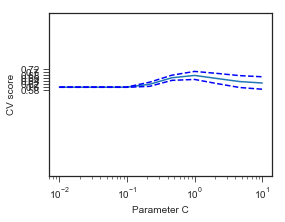

In [69]:
execute_using_cv(X, y)

In [70]:
classifiers = []
classifiers.append([LinearSVC(), "LinearSVC"])
classifiers.append([BernoulliNB(), "BernoulliNB"])
classifiers.append([MultinomialNB(), "MultiNB"])
classifiers.append([KNeighborsClassifier(n_neighbors=10), "kNN"])
classifiers.append([AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'), "AdaBoost"])
classifiers.append([RandomForestClassifier(n_estimators=100), "Random forest"])
#classifiers.append([SVC(kernel='rbf', class_weight='balanced', decision_function_shape='ovo'), "Baseline ovo rbf SVM"])

In [71]:
param_grid = {'C': np.logspace(-2, 1, 10),
                  #'kernel': ['rbf', 'linear', 'poly'],
                  #'gamma': [0.0005, 0.001, 0.005, 0.01, 0.1, 1.0],     # Use for testing rbf, poly
                 'degree': [1,2,3]}
svm = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid, cv=5)
results = []

for clf in classifiers:
    results.append(execute(clf[0], clf[1], X_train, X_test, y_train, y_test))

LinearSVC (F1 score=0.717, Accuracy=0.7282)
Precision:  [0.68965517 0.47474747 0.79245283]
Recall:  [0.54945055 0.39830508 0.89786223]
BernoulliNB (F1 score=0.643, Accuracy=0.6657)
Precision:  [0.61111111 0.37647059 0.72745098]
Recall:  [0.42307692 0.27118644 0.88123515]
MultiNB (F1 score=0.558, Accuracy=0.6436)
Precision:  [0.66071429 0.58823529 0.64351852]
Recall:  [0.2032967  0.08474576 0.99049881]
kNN (F1 score=0.645, Accuracy=0.6713)
Precision:  [0.6031746  0.41333333 0.725     ]
Recall:  [0.41758242 0.26271186 0.89548694]
AdaBoost (F1 score=0.604, Accuracy=0.6380)
Precision:  [0.54098361 0.42372881 0.68333333]
Recall:  [0.36263736 0.21186441 0.87648456]
Random forest (F1 score=0.664, Accuracy=0.6852)
Precision:  [0.65833333 0.41573034 0.73828125]
Recall:  [0.43406593 0.31355932 0.89786223]


In [72]:
url = r'C:\Users\Manika\Desktop\Dataset\data-2_train.csv'
print("Downloading test data from {}".format(url))
frame_train = download_data(url)

In [80]:
test_url = r'C:\Users\Manika\Desktop\Dataset\Data-1_test.csv'
#test_url = r'C:\Users\Manika\Desktop\Dataset\Data-2_test.csv'
print("Downloading test data from {}".format(test_url))
frame_test = download_data(test_url)

In [81]:
# Process data into feature and label arrays
print("Processing {} training samples with {} attributes".format(len(frame_train.index), len(frame_train.columns)))
X_train, y_train, fnames_trian = transform_features_and_labels(frame_train)

Processing 3602 training samples with 5 attributes


In [82]:
print("Processing {} test samples with {} attributes".format(len(frame_test.index), len(frame_test.columns)))
X_test, y_test, fnames_test = transform_features_and_labels(frame_test, skip_label=True)

Processing 638 test samples with 4 attributes


In [83]:
i_keep_train = np.nonzero(np.in1d(fnames_trian, fnames_test))[0]
i_keep_test = np.nonzero(np.in1d(fnames_test, fnames_trian))[0]
X_train = X_train[:, i_keep_train]
X_test = X_test[:, i_keep_test]

In [84]:
clf = LinearSVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)
#print('{} (F1 score={:.3f}, Accuracy={:.4f})'.format("LinearSVC", score, acc))

C:\Python\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [85]:
print("Writing predictions to file..")
import os
result_file = "Manika_Maheshwari_Rahul_Sathe.txt";
try:
    os.remove(result_file)
except OSError:
    pass
file = open(result_file, "w") 
frame_test_arr = np.array(frame_test)

for i,p in enumerate(pred):
    file.write("{};;{}\n".format(frame_test_arr[i][0], p))
file.close()

Writing predictions to file..


In [79]:
import os
os.getcwd()

'C:\\Users\\Manika\\Desktop\\Dataset'